### Identifying Trend Stucture with Python

* Hello, we will be going over how to identify trend structure like higher highs/lows and lower lows/highs.
* Trend structure is important in trading financial markets and can help identify entry and exit points along with indication as to whether the trend will continue or stall.
* We will be using scipy, pandas, and numpy.

In [6]:
import pandas as pd
import numpy as np
from scipy import signal
import matplotlib
import matplotlib.pyplot as plt

In [58]:
# I downloaded 3 months of TSLA Daily data fron yahoo finance
path = ('~/Desktop/TSLA.csv')
df = pd.read_csv(path, parse_dates=True, infer_datetime_format=True)

# Set index as Date and drop the Date column
df = df.set_index('Date', drop=True).round(2)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-10-19,446.24,447.00,428.87,430.83,430.83,36287800
2020-10-20,431.75,431.75,419.05,421.94,421.94,31656300
2020-10-21,422.70,432.95,421.25,422.64,422.64,32370500
2020-10-22,441.92,445.23,424.51,425.79,425.79,39993200
2020-10-23,421.84,422.89,407.38,420.63,420.63,33717000
...,...,...,...,...,...,...
2021-01-11,849.40,854.43,803.62,811.19,811.19,59554100
2021-01-12,831.00,868.00,827.34,849.44,849.44,46270700
2021-01-13,852.76,860.47,832.00,854.41,854.41,33312500


/Users/christianlahaine/opt/anaconda3/envs/algotrading/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/christianlahaine/opt/anaconda3/envs/algotrading/lib/python3.8/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


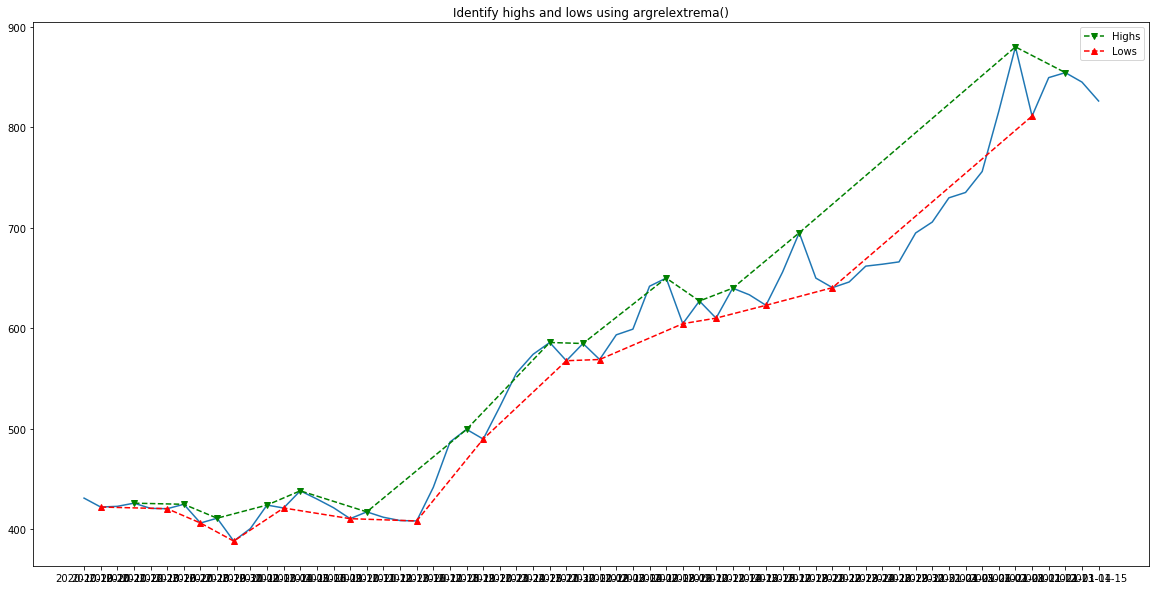

In [59]:
# Define data.
x = df['Adj Close']
y = df['Adj Close']
 
# Find peaks(max).
highs = signal.argrelextrema(y.to_numpy(), np.greater)
highs = highs[0]
 
# Find valleys(min).
lows = signal.argrelextrema(y.to_numpy(), np.less)
lows = lows[0]
 
# Plot main graph.
(fig, ax) = plt.subplots(figsize=(20,10))
ax.plot(x)
 
# Plot peaks.
highs_x = highs
highs_y = y[highs]
ax.plot(highs_x, highs_y, marker='v', linestyle='dashed', color='green', label="Highs")
 
# Plot valleys.
lows_x = lows
lows_y = y[lows]
ax.plot(lows_x, lows_y, marker='^', linestyle='dashed', color='red', label="Lows")
 
# Plot title and legend
plt.title('Identify highs and lows using argrelextrema()')
plt.legend(loc='best')
plt.show()

In [60]:
# Return price at which point is located
high_indx = signal.argrelextrema(y.to_numpy(), np.greater)
hidx = y[high_indx[0]]

low_indx = signal.argrelextrema(y.to_numpy(), np.less)
lidx = y[low_indx[0]]

In [73]:
# Create df of highs and lows
h_df = pd.DataFrame()
h_df['Highs'] = hidx

l_df = pd.DataFrame()
l_df['Lows'] = lidx

In [74]:
# Create df with price and highs/lows
dfr = pd.DataFrame()
dfr['Price'] = df['Adj Close']
dfr = pd.concat([dfr,h_df,l_df], axis=1)
dfr

,Price,Highs,Lows
2020-10-19,430.83,NaN,NaN
2020-10-20,421.94,NaN,421.94
2020-10-21,422.64,NaN,NaN
2020-10-22,425.79,425.79,NaN
2020-10-23,420.63,NaN,NaN
...,...,...,...
2021-01-11,811.19,NaN,811.19
2021-01-12,849.44,NaN,NaN
2021-01-13,854.41,854.41,NaN
2021-01-14,845.00,NaN,NaN


* Overall it's pretty simple to  idenfity the highs and lows within the data. 
* This can then be used for entry exit and stop placement. 